In [1]:
### https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
!nvidia-smi

Sat Feb 11 14:18:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    33W /  70W |    332MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from keras.datasets import cifar10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# normalise data -> make the numbers smaller for better results

import numpy as np

x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

[1]


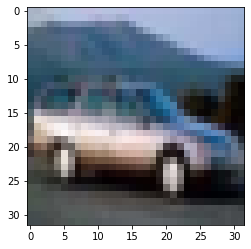

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[4])
plt.imshow(x_train[4])
plt.show()

In [9]:
# generate categorical from y_train model
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [48]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [49]:
model.fit(x_train, y_train, epochs=20, batch_size=254, shuffle=True)

Epoch 1/20
197/197 [==============================] - 10s 34ms/step - loss: 2.1506 - accuracy: 0.2006
Epoch 2/20
197/197 [==============================] - 6s 33ms/step - loss: 1.8245 - accuracy: 0.3227
Epoch 3/20
197/197 [==============================] - 6s 32ms/step - loss: 1.6129 - accuracy: 0.4082
Epoch 4/20
197/197 [==============================] - 7s 33ms/step - loss: 1.4698 - accuracy: 0.4651
Epoch 5/20
197/197 [==============================] - 6s 33ms/step - loss: 1.3349 - accuracy: 0.5166
Epoch 6/20
197/197 [==============================] - 6s 33ms/step - loss: 1.2139 - accuracy: 0.5657
Epoch 7/20
197/197 [==============================] - 6s 32ms/step - loss: 1.1006 - accuracy: 0.6056
Epoch 8/20
197/197 [==============================] - 6s 32ms/step - loss: 1.0155 - accuracy: 0.6404
Epoch 9/20
197/197 [==============================] - 6s 32ms/step - loss: 0.9358 - accuracy: 0.6686
Epoch 10/20
197/197 [==============================] - 6s 32ms/step - loss: 0.8578 - accur

In [50]:
model.evaluate(x_train, y_train)

1563/1563 [==============================] - 8s 5ms/step - loss: 0.2298 - accuracy: 0.9215


[0.22983220219612122, 0.921500027179718]

In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6782 - accuracy: 0.7926


[0.6781862378120422, 0.7925999760627747]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


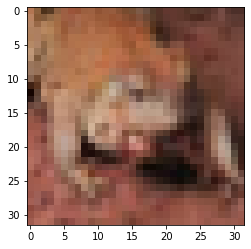

In [35]:
print(y_test[5])
plt.imshow(x_test[5])
plt.show()

In [36]:
p = x_test[5].reshape(1, 32, 32, 3)
p.shape

(1, 32, 32, 3)

In [29]:
np.argmax(model.predict(p))

1/1 [==============================] - 0s 146ms/step


6

In [52]:
# Confusion Matrix on test data
import pandas as pd

pred = model.predict(x_test)
ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

313/313 [==============================] - 1s 3ms/step


pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,852,11,54,13,2,3,2,10,37,16
1,12,918,1,4,0,2,3,1,13,46
2,59,4,768,32,47,30,23,25,5,7
3,27,5,102,612,28,125,34,41,14,12
4,27,2,105,36,688,29,14,91,6,2
5,9,1,78,138,18,673,17,58,2,6
6,6,8,70,47,40,17,798,4,8,2
7,13,2,36,30,19,25,0,870,3,2
8,52,21,10,8,1,2,3,8,885,10
